In [7]:
library(tidyverse)
library(haven)

In [27]:
# Natürliches Experiment
# Bestimmung des Effekts Lohnauffüllung durch Lohnsubvenstion - Earned Income Tax Credit
#
#  Difference-in-differences coefficient” = \delta_1
# 
# 
# Ziel: Schätzen des Effekts von EITC auf Beschäftigung für Frauen mit mindestens einem Kind
# => Kontrolle: kein kind - bekommt kein EITC

In [47]:
## Daten einlesen
data <- read_dta("~/Documents/Data/eitc.dta")

range(data$year)

[1] 1991 1996

In [45]:
## Dummies erzeugen
data <- data %>%
    mutate(post93  = year     >= 1994, 
           anykids = children >= 1)

In [46]:
head(data)

state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,post93,anykids
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
11,1991,7.6,0,1,18714.394,18714.3943,26,10,1,0.000000,FALSE,FALSE
12,1991,7.2,1,0,4838.568,471.3656,22,9,1,4.367203,FALSE,TRUE
13,1991,6.4,2,0,8178.194,0.0000,33,11,0,8.178194,FALSE,TRUE
14,1991,9.1,0,1,9369.570,0.0000,43,11,0,9.369570,FALSE,FALSE
15,1991,8.6,3,1,14706.608,14706.6079,23,7,1,0.000000,FALSE,TRUE
16,1991,6.8,1,0,21605.044,18854.6256,53,7,1,2.750419,FALSE,TRUE


In [40]:
data %>% group_by(post93,anykids) %>% summarize(mean = mean(work))

post93,anykids,mean
<lgl>,<lgl>,<dbl>
FALSE,FALSE,0.5754597
FALSE,TRUE,0.4459619
TRUE,FALSE,0.5733862
TRUE,TRUE,0.4907615


No summary function supplied, defaulting to `mean_se()


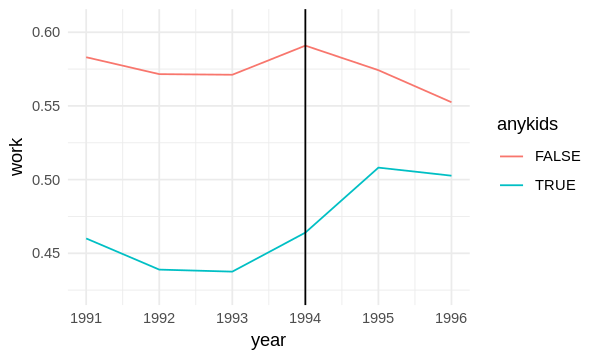

In [31]:
## Parallel Trends Assumption

options(repr.plot.width=5, repr.plot.height=3)

ggplot(data, aes(year, work, color = anykids)) +
    stat_summary(geom = 'line') +
    geom_vline(xintercept = 1994) +
    theme_minimal()

# => vor t_0 waren parallele trends - also erfüllt

In [32]:
## Modell
model = lm(work ~ anykids*post93, data = data)
summary(model)

# EITC erhöhte Beschäftigung um ~5%, für Frauen mit einem Kind
# => blaue Linie geht 45% auf 52% 


Call:
lm(formula = work ~ anykids * post93, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5755 -0.4908  0.4245  0.5092  0.5540 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.575460   0.008845  65.060  < 2e-16 ***
anykidsTRUE            -0.129498   0.011676 -11.091  < 2e-16 ***
post93TRUE             -0.002074   0.012931  -0.160  0.87261    
anykidsTRUE:post93TRUE  0.046873   0.017158   2.732  0.00631 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4967 on 13742 degrees of freedom
Multiple R-squared:  0.0126,	Adjusted R-squared:  0.01238 
F-statistic: 58.45 on 3 and 13742 DF,  p-value: < 2.2e-16
